In [1]:
## Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#gambar_path='D:/tugas-kelompok-dts/dataset/facial_expression_recognition/images/'

zip_source_path='/content/drive/MyDrive/proA-ml/demo/facial_expression_recognition.zip'
zip_target_path='/content/drive/MyDrive/proA-ml/demo/facial_expression_recognition'

In [ ]:
!unzip /content/drive/MyDrive/proA-ml/demo/facial_expression_recognition.zip -d /content/drive/MyDrive/proA-ml/demo/facial_expression_recognition

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: /content/drive/MyDrive/proA-ml/demo/facial_expression_recognition/images/validation/fear/8797.jpg  
  inflating: /content/drive/MyDrive/proA-ml/demo/facial_expression_recognition/images/validation/fear/8818.jpg  
  inflating: /content/drive/MyDrive/proA-ml/demo/facial_expression_recognition/images/validation/fear/886.jpg  
  inflating: /content/drive/MyDrive/proA-ml/demo/facial_expression_recognition/images/validation/fear/9037.jpg  
  inflating: /content/drive/MyDrive/proA-ml/demo/facial_expression_recognition/images/validation/fear/9040.jpg  
  inflating: /content/drive/MyDrive/proA-ml/demo/facial_expression_recognition/images/validation/fear/9101.jpg  
  inflating: /content/drive/MyDrive/proA-ml/demo/facial_expression_recognition/images/validation/fear/911.jpg  
  inflating: /content/drive/MyDrive/proA-ml/demo/facial_expression_recognition/images/validation/fear/9179.jpg  
  inflating: /content/drive/MyDrive/pro

In [3]:
#UKURAN_FOTO=150
#ukuran 150 muncul error Unable to allocate 14.5 GiB for an array with shape
UKURAN_FOTO=48


In [4]:
gambar_path = os.path.join(zip_target_path, 'images')

In [5]:
def buat_dataset():
    data_gambar_array = []
    nama_class = []
   
    for ekspresi_wajah in os.listdir(os.path.join(gambar_path, 'train')):
        for file in tqdm(os.listdir(os.path.join(gambar_path, 'train', ekspresi_wajah))):
            foto_path = os.path.join(gambar_path, 'train', ekspresi_wajah, file)
            foto = cv2.imread(foto_path,cv2.IMREAD_GRAYSCALE)
            foto = cv2.resize(foto, (UKURAN_FOTO,UKURAN_FOTO))
            
            data_gambar_array.append(np.array(foto))
            nama_class.append(ekspresi_wajah)
    return data_gambar_array, nama_class

In [ ]:
data_foto, nama_class = buat_dataset()

 96%|█████████▌| 4742/4938 [00:15<00:00, 370.95it/s]

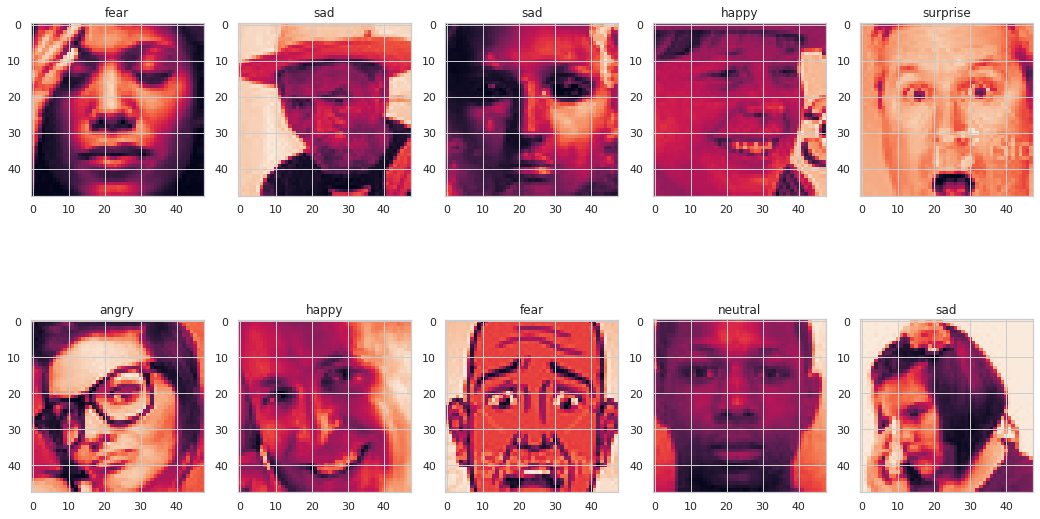

In [9]:
import random as rn
plt.figure(0, figsize=(16,10))
for i in range(1, 11):
    plt.subplot(2,5,i)
    l=rn.randint(0,len(nama_class))    
    plt.imshow(data_foto[l])
    plt.title(nama_class[l])
plt.show()


In [10]:
le=LabelEncoder()
Y=le.fit_transform(nama_class)
Y=to_categorical(Y,len(nama_class))
X=np.array(data_foto)
#X=np.array(data_foto, dtype='float32').reshape(-1,UKURAN_FOTO, UKURAN_FOTO,1)
X=X/255

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [12]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (UKURAN_FOTO,UKURAN_FOTO,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(len(nama_class), activation = "softmax"))

In [13]:
#initilize parameters
jumlah_class = len(nama_class) 
#width, height = 48, 48
jumlah_epochs = 50
ukuran_batch = 64
jumlah_features = 64

In [14]:
model = Sequential()

#module 1
model.add(Conv2D(2*2*jumlah_features, kernel_size=(3, 3), input_shape=(UKURAN_FOTO, UKURAN_FOTO, 1), data_format='channels_last'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(2*2*jumlah_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#module 2
model.add(Conv2D(2*jumlah_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(2*jumlah_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#module 3
model.add(Conv2D(jumlah_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(jumlah_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#flatten
model.add(Flatten())

#dense 1
model.add(Dense(2*2*2*jumlah_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

#dense 2
model.add(Dense(2*2*jumlah_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

#dense 3
model.add(Dense(2*jumlah_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

#output layer
model.add(Dense(jumlah_class, activation='softmax'))


In [15]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 256)       2560      
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 46, 46, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 46, 46, 256)       0

In [17]:
#data_generator = ImageDataGenerator()
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)

In [18]:
x_train = np.array(x_train, dtype='float32').reshape(-1,UKURAN_FOTO, UKURAN_FOTO,1)/255.0

In [19]:
history = model.fit_generator(data_generator.flow(x_train, y_train, ukuran_batch),
                                steps_per_epoch=len(x_train) / ukuran_batch,
                                epochs=jumlah_epochs,
                                verbose=2, 
                                validation_data=(x_test, y_test))

Epoch 1/50
337/337 - 56s - loss: 2.7192 - accuracy: 0.2437 - val_loss: 2.1849 - val_accuracy: 0.2392 - 56s/epoch - 167ms/step
Epoch 2/50
337/337 - 39s - loss: 1.6461 - accuracy: 0.3452 - val_loss: 10.8963 - val_accuracy: 0.2112 - 39s/epoch - 115ms/step
Epoch 3/50
337/337 - 39s - loss: 1.3938 - accuracy: 0.4673 - val_loss: 22.5927 - val_accuracy: 0.2448 - 39s/epoch - 115ms/step
Epoch 4/50
337/337 - 44s - loss: 1.2784 - accuracy: 0.5125 - val_loss: 52.6893 - val_accuracy: 0.2907 - 44s/epoch - 131ms/step
Epoch 5/50
337/337 - 40s - loss: 1.2029 - accuracy: 0.5413 - val_loss: 134.2157 - val_accuracy: 0.1527 - 40s/epoch - 118ms/step
Epoch 6/50
337/337 - 40s - loss: 1.1609 - accuracy: 0.5597 - val_loss: 112.9117 - val_accuracy: 0.2831 - 40s/epoch - 117ms/step
Epoch 7/50
337/337 - 40s - loss: 1.1151 - accuracy: 0.5769 - val_loss: 197.3204 - val_accuracy: 0.2644 - 40s/epoch - 118ms/step
Epoch 8/50
337/337 - 40s - loss: 1.0836 - accuracy: 0.5932 - val_loss: 150.7302 - val_accuracy: 0.2852 - 40s/

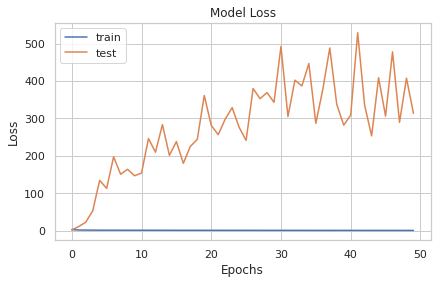

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

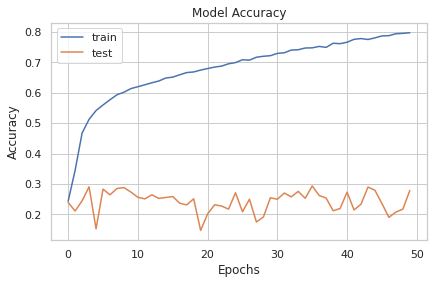

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [ ]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[prop_class[count]]]))))
        plt.tight_layout()
        count+=1

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[mis_class[count]]]))))
        plt.tight_layout()
        count+=1